# Quick viz demos

Requires:

    conda install vispy pyopengl
    pip install welly
    pip install decorator --upgrade


## Topo map

In [1]:
import numpy as np

# % matplotlib notebook
% matplotlib inline

import matplotlib.pyplot as plt

In [2]:
before = np.load('../data/st-helens_before.npy')
after = np.load('../data/st-helens_after.npy')

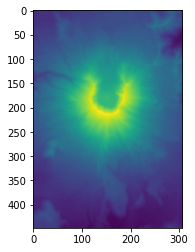

In [3]:
plt.imshow(after)
plt.show()

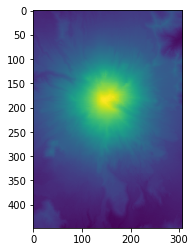

In [4]:
plt.imshow(before)

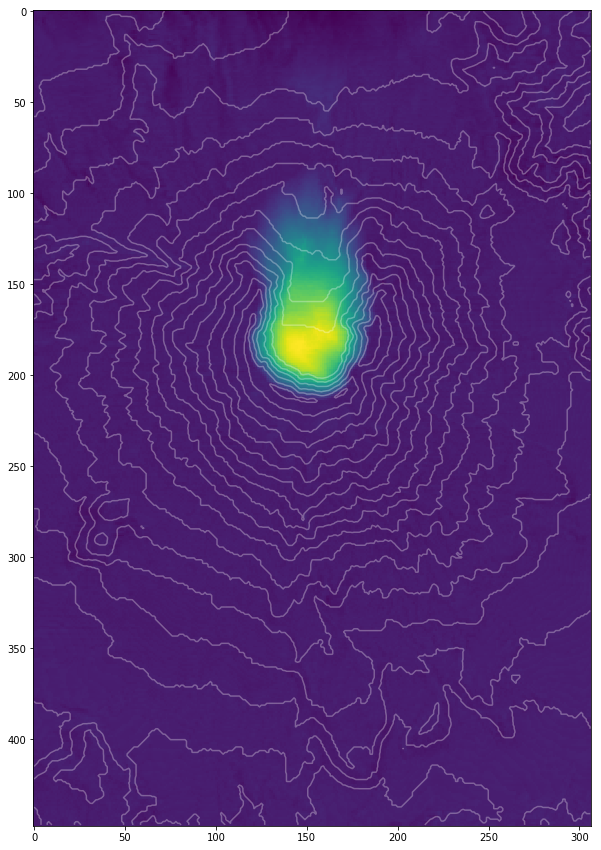

In [5]:
diff = before - after

plt.figure(figsize=(10, 15))
plt.imshow(diff, aspect='auto')
plt.contour(after,
            levels=np.arange(int(after.min()), after.max(), 100),
            linestyles='solid', colors=['white'], alpha=0.3)
plt.show()

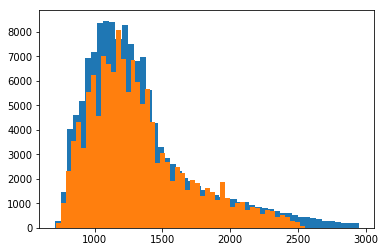

In [6]:
_ = plt.hist(before.flatten(), bins=50, lw=0)
_ = plt.hist(after.flatten(), bins=50, lw=0)

## Topo map surface with `mplot3d`

This makes a static 3D plot using `matplotlib`'s [`mplot3d` module](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

Quick plot with fewest parameters:

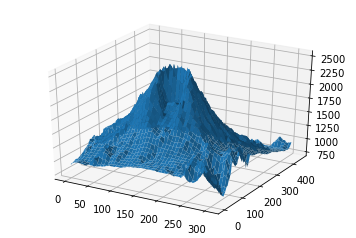

In [7]:
from mpl_toolkits.mplot3d import Axes3D

rcount, ccount = after.shape
x, y = np.arange(ccount), np.arange(rcount)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, after)
plt.show()

A bit nicer. You have to pass `rcount` and `ccount` otherwise it downsamples to 50 &times; 50.

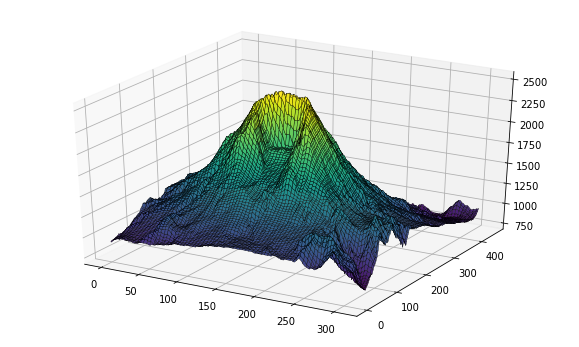

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, after, cmap='viridis', rcount=150, ccount=100, edgecolor='black', lw=0.33)
plt.show()

## Topo map surface with `plotly`

**I get a lot of weird cruft coming back to the Notebok with this method.**

In [9]:
# from plotly.offline import download_plotlyjs, init_notebook_mode
# init_notebook_mode(connected=True)

In [10]:
# import plotly.offline as po
# import plotly.graph_objs as go

# surf = go.Surface(z=data)

# fig = go.Figure(data=[surf])
# po.iplot(fig)

## Maps with `cartopy`

`basemap` is dead! Long live `cartopy`!

Except no... this doesn't work on macOS at least. Some sort of GEOS bug.

/home/matt/anaconda3/envs/geocomp/lib/python3.6/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


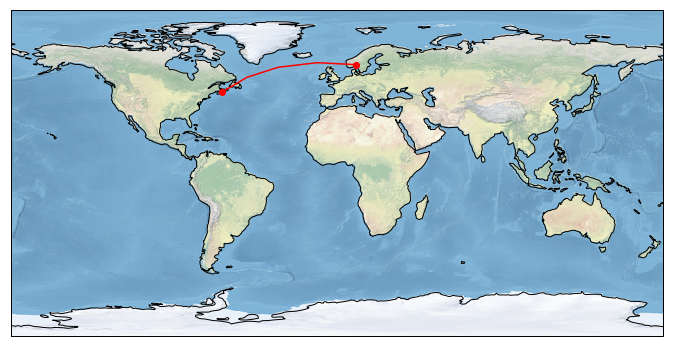

In [11]:
import cartopy.crs as ccrs

plt.figure(figsize=(12,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

yhz = 44.6488, -63.5752
osl = 59.9139,  10.7522

ax.plot([yhz[1], osl[1]], [yhz[0], osl[0]],
        'r-o',
        transform=ccrs.Geodetic()
       )

plt.show()

## Seismic volume with `ipyvolume`

**I haven't spent a lot of time on it, but this doesn't work well for me.**

First do this:

    conda install -c conda-forge ipywidgets
    conda install -c conda-forge ipyvolume
    
If you install with conda, then you should not need to do:

    jupyter nbextension enable --py --sys-prefix widgetsnbextension
    jupyter nbextension enable --py --user ipyvolume
    
**You also must launch the notebook from the conda env you installed in!**

In [12]:
data = np.load('../data/seismic.npy')

In [13]:
import ipyvolume.pylab as p3

ModuleNotFoundError: No module named 'ipyvolume'

In [28]:
fig = p3.figure()
p3.style.use('dark')
p3.volshow(data)
p3.show()

VBox(children=(VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.1, max=1.0, step=0.001), FloatSlider(value=0.5, max=1.0, step=0.001), FloatSlider(value=0.9, max=1.0, step=0.001))), HBox(children=(Label(value='opacities:'), FloatSlider(value=0.01, max=0.2, step=0.001), FloatSlider(value=0.05, max=0.2, step=0.001), FloatSlider(value=0.05, max=0.2, step=0.001))))), Figure(camera_center=[0.0, 0.0, 0.0], data_max=30439.0, data_min=-27272.0, height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'background-color': 'black', 'axes': {'visible': True, 'color': 'white', 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}}, 'box': {'visible': True}}, tf=TransferFunctionWidgetJs3(level3=0.9), volume_data=array([[[-1984,  -195,  1851, ...,  -596,    96,   -43],
        [   52,  1313,  2772, ...,  -286,   131,   394],
        [  659,  1660,  2311, ...,  -956,  -493,   -93],
        ..., 
        [-3563, -3080, -4255, ...,  1104, -1013, -1372],
        [-1127,  2595, -1166, ...,   651,   405,   201],
        [-1719,  1854, -2300, ...,   803,   480,  -121]],

       [[-3408, -3160, -1489, ...,  -728,  -212,   -15],
        [-1059, -1411,   282, ...,  -353,  -348,  -169],
        [ -943, -1552,  -140, ...,  -698,  -187,   -67],
        ..., 
        [-4406, -4845, -5827, ...,   961,   -42, -1381],
        [-3312, -1373, -4522, ...,  1280,   465,   209],
        [-3963, -2845, -5762, ...,  1235,   338, -1336]],

       [[ -359,  -886, -2281, ...,  -145,   -96,  -625],
        [ -430, -1241, -1606, ...,  -172,  -388, -1361],
        [ -294, -1981, -1925, ...,  -507,  -549,  -518],
        ..., 
        [ -138, -2608, -1351, ...,  1101,  -576, -1079],
        [-4172, -4918, -2877, ...,  1245,   304,   483],
        [ -917, -3060, -2781, ...,   425,    -3,  -598]],

       ..., 
       [[ 1163,   938,  1029, ...,  -546, -1000, -1686],
        [ 1960,  1297,  1924, ..., -1220,  -274,  -860],
        [ 1668,  1128,  1791, ..., -2406,  -997, -1272],
        ..., 
        [ -319,   877,  -437, ...,  2894, -2512,   -61],
        [  304,  -182,  -580, ...,  2349,   752,   548],
        [    9,  -554,   -84, ...,  2162,  1163,  2613]],

       [[  428,  -112,   518, ..., -2418, -1905, -1080],
        [-1274,  -907,   -31, ...,  -912, -1271, -1401],
        [ -300,  -177,  -193, ..., -2059, -1337, -1965],
        ..., 
        [ -975, -1043, -2085, ...,  2010,  -103,   320],
        [ -764,  -857, -1172, ...,  -197,   909,    95],
        [ -886,  -808,  -800, ...,  1444,     9,  1899]],

       [[ -747,  -422,  -346, ...,    26,   534,   868],
        [-1226,  -624,  -609, ...,   672,   264,   940],
        [-1293,    47,  -864, ...,  1305,    41,   658],
        ..., 
        [ -265, -1387, -1000, ..., -1493,  -430,  -141],
        [-1008, -1201, -1014, ..., -2143,  -107,   956],
        [ -979, -1076, -1271, ...,  -702, -1531,   457]]], dtype=int16), width=400, xlim=[0.0, 1.0], ylim=[0.0, 1.0], zlim=[0.0, 1.0]), HBox(children=(FloatSlider(value=0.5, description='ambient', max=1.0, step=0.001), FloatSlider(value=0.8, description='diffuse', max=1.0, step=0.001))), HBox(children=(FloatSlider(value=0.5, description='specular', max=1.0, step=0.001), FloatSlider(value=5.0, description='specular exp', max=10.0, step=0.001)))))

## Seismic volume with `vispy`

In [14]:
import vispy.plot as vp

ModuleNotFoundError: No module named 'vispy'

In [30]:
data = np.load('../data/seismic.npy')
fig = vp.Fig(show=False)
scene = fig[0, 0]
scene.volume(data, cmap='viridis', clim=[0, 2e4])
fig.show(run=True)

## Well log with `welly`

In [15]:
from welly import Well

w = Well.from_las('../data/L-30.las')

In [16]:
w

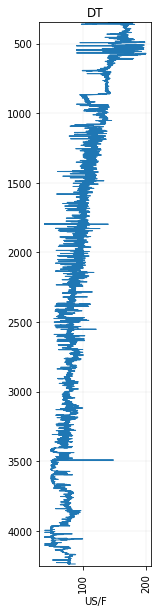

In [17]:
dt = w.data['DT']
dt.plot()